In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
csv_path = Path("../Project_1/HistoricalQuotes.csv")
spy_hist_quotes = pd.read_csv(csv_path)

In [3]:
spy_hist_quotes.drop(columns=['open', 'high', 'low', 'volume'], inplace=True)
spy_close = spy_hist_quotes.set_index('date')

In [4]:
daily_returns = spy_close.pct_change()
daily_returns.head()

,close
date,
13:43,NaN
2019/09/18,-0.001062
2019/09/17,-0.000598
2019/09/16,-0.002526
2019/09/13,0.003098


In [5]:
avg_daily_return = daily_returns.mean()['close']
avg_daily_return

-0.0004228448051552237

In [6]:
std_dev_daily_return = daily_returns.std()['close']
std_dev_daily_return

0.009533882126319712

In [35]:
num_trading_days = 252
spy_last_price = spy_close['close'][-1]

In [42]:
num_simulations = 1000
monte_carlo_spy = pd.DataFrame()
for n in range(num_simulations):

    simulated_spy_prices = [spy_last_price]

    for i in range(num_trading_days):
        simulated_price = simulated_spy_prices[-1] * (1 + np.random.normal(avg_daily_return, std_dev_daily_return))
        simulated_spy_prices.append(simulated_price)
    
    monte_carlo_spy[f"Simulation {n+1}"] = pd.Series(simulated_spy_prices)

monte_carlo_spy.head()

,Simulation 1,Simulation 2,Simulation 3,Simulation 4,Simulation 5,Simulation 6,Simulation 7,Simulation 8,Simulation 9,Simulation 10,...,Simulation 991,Simulation 992,Simulation 993,Simulation 994,Simulation 995,Simulation 996,Simulation 997,Simulation 998,Simulation 999,Simulation 1000
0,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000,...,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000,292.400000
1,293.289258,293.070073,292.338725,289.759122,291.986887,291.435718,292.363557,291.463660,292.836465,296.571209,...,287.011736,293.689398,293.398449,298.052071,293.839942,294.175139,288.853111,291.955701,291.057497,292.455540
2,294.582333,293.043895,290.356731,291.590479,293.193452,291.549083,292.013593,288.852395,292.068985,297.739633,...,287.780230,291.520915,293.856479,296.986186,298.890216,297.357471,292.285464,295.912788,291.913858,293.039875
3,297.334783,295.737907,287.360326,291.968370,295.483754,291.417919,288.866069,289.245283,296.023799,300.086378,...,290.112170,291.702373,292.153307,299.633064,302.110084,297.800419,288.198055,298.621241,286.515776,291.354312
4,296.886256,291.841739,283.242676,293.543184,298.296762,291.668436,283.096129,291.403606,297.878948,302.552672,...,287.500873,291.181956,289.391029,299.163324,300.854801,296.544210,286.489341,291.410956,286.945632,296.334887


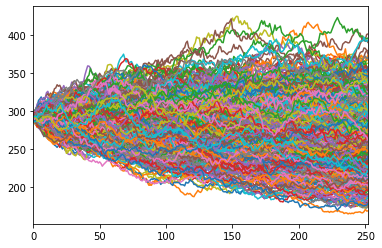

In [43]:
monte_carlo_spy.plot(legend = None)

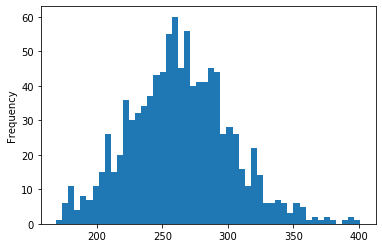

In [44]:
ending_cumulative_returns = monte_carlo_spy.iloc[-1, :]
ending_cumulative_returns.plot(kind='hist', bins = 50)

In [45]:
confidence_interval = ending_cumulative_returns.quantile(q=[0.025, 0.975])
confidence_interval

0.025    188.965852
0.975    343.908974
Name: 252, dtype: float64

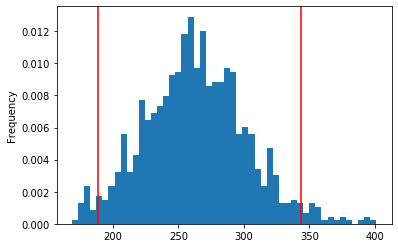

In [46]:
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=50)
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')